# COSC 2779 Deep learning: Assignment 2


## Data Exploration & Analysis



### Data Retrieval

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/My Drive/StanceDataset/

# Check current OS directory
!ls

/content/gdrive/My Drive/StanceDataset
glove.twitter.27B.100d.txt  glove.twitter.27B.25d.txt  train.csv
glove.twitter.27B.200d.txt  test.csv


In [3]:
# Import Essential dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import tensorflow as tf

In [4]:
!pip install nltk

import nltk



In [5]:
# Read train and test dataset.
with open('train.csv','r',encoding='ISO-8859-1') as f:
    train_data = pd.read_csv(f)

with open('test.csv','r',encoding='ISO-8859-1') as y:
    test_data = pd.read_csv(y)
    
    
f.close()
y.close()

In [6]:
from sklearn.utils import shuffle
train_data = shuffle(train_data)
train_data.reset_index(inplace=True, drop=True)

In [7]:
train_data.head(20)

Tweet  ... Sentiment
0   @HillaryClinton Yes! I am chipping in 5$ becau...  ...       pos
1   Interesting in the video she kidnaps and tortu...  ...       neg
2   Mzwakhe mbuli says doctors & nurses are paid a...  ...       neg
3   Nothing lies beyond the reach of prayer except...  ...       pos
4   @Scullybones027 And where is @AmnestyIreland ?...  ...       neg
5   Jesus  I know you didn't bring me this far to ...  ...       pos
6   Fruity Pebbles might just be the perfect break...  ...       pos
7   What the fuck do women even do? I mean serious...  ...       neg
8   John Watterson is attending IPPC meeting to he...  ...       pos
9   Lol what's so ugly about wanting to be equal? ...  ...       neg
10  @Awyee707 @TigerClaud You compared playing wit...  ...       neg
11   Mary, Help of Christians persecuted everywher...  ...       pos
12  Before we go looking for #life on other #plane...  ...       neg
13  I don't  care why the globe is warming. I just...  ...       neg
14  Because as long as we're ending innocent lives...  ...       neg
15  @rimmedlarry Actually, the tag was made by fem...  ...       neg
16  #HillaryClinton might want to book smaller ven...  ...       neg
17  Go Dutch New meaning: citizens take their gove...  ...       pos
18  I have never been more dismayed for the future...  ...       neg
19  We think the message will offend people, but w...  ...       pos

[20 rows x 5 columns]

In [8]:
test_data.head(20)
    

Tweet  ... Sentiment
0   He who exalts himself shall      be humbled; a...  ...       pos
1   RT @prayerbullets: I remove Nehushtan -previou...  ...     other
2   @Brainman365 @heidtjj @BenjaminLives I have so...  ...       pos
3   #God is utterly powerless without Human interv...  ...       neg
4   @David_Cameron   Miracles of #Multiculturalism...  ...       neg
5   This world needs a tight group hug. Tight enou...  ...       pos
6   Morality is not derived from religion, it prec...  ...       pos
7   A Godly husband  - knows you - trusts you - lo...  ...       pos
8   @SecularDutchess I'll be your huckleberry @Dea...  ...     other
9   #BIBLE = Big Irrelevant Book of Lies and Exagg...  ...       neg
10  If only dreams were real, now it's gone. #Sing...  ...       neg
11  Happy Independence Day to America and her beau...  ...       pos
12  Let my house be built by wisdom and become str...  ...       pos
13  These days, the cool kids are atheists.  #free...  ...       pos
14  Next time you hear someone say that our Foundi...  ...       neg
15  #ILoveIslamBecause and v should love Islam bec...  ...       pos
16  Be a sinner and sin strongly, but more strongl...  ...       pos
17  #God > My fears God > My insecurities God > My...  ...       pos
18  Mary, Queen of martyrs, pray for us. #Catholic...  ...       pos
19  America, like all of us, has both beauty and b...  ...       neg

[20 rows x 5 columns]

In [9]:

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText


# train_data['Tweet'] = preprocess(train_data['Tweet'])

In [10]:
train_data['Tweet']

0       @HillaryClinton Yes! I am chipping in 5$ becau...
1       Interesting in the video she kidnaps and tortu...
2       Mzwakhe mbuli says doctors & nurses are paid a...
3       Nothing lies beyond the reach of prayer except...
4       @Scullybones027 And where is @AmnestyIreland ?...
                              ...                        
2909    @AutumnNAlston @JonathanDKF @_sarah_babb_ @McC...
2910    It hurts my  2 C ppl more offended over a flag...
2911    @pamnsc @TRPhrophet @RamblingMother Thank you ...
2912    @Natee909 @victoria_abii nah abi gonna get mar...
2913    God is faithful, his gospel is powerful, and t...
Name: Tweet, Length: 2914, dtype: object

In [11]:

# Number of Stance
train_data['Stance'].unique()


array(['FAVOR', 'AGAINST', 'NONE'], dtype=object)

In [12]:

# Number of Target Topic
train_data['Target'].unique()

array(['Hillary Clinton', 'Feminist Movement', 'Legalization of Abortion',
       'Atheism', 'Climate Change is a Real Concern'], dtype=object)

### Observe Stance Distribution for each target topic

In [13]:
import seaborn as sns

def plotTopicDist(TARGET_TOPIC):
  index = 0

  counter = [0,0,0]


  for topic in train_data['Target']:
    if topic == TARGET_TOPIC:
      y = 0
      for stance in train_data['Stance'].unique():
        if stance == train_data['Stance'][index]:
          counter[y] += 1
        y+=1


    index+=1

  df = pd.DataFrame([{'x':'AGAINST','y':counter[0]},{'x':'FAVOUR','y':counter[1]},{'x':'NONE','y':counter[2]}])
  sns.barplot(x = 'x',
              y = 'y',
              data = df)

  plt.title("TARGET TOPIC: "+str(TARGET_TOPIC))

  plt.show()

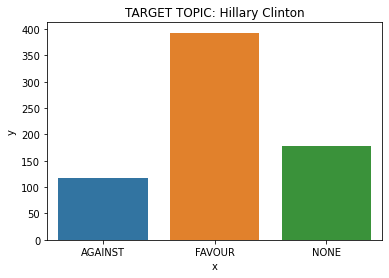

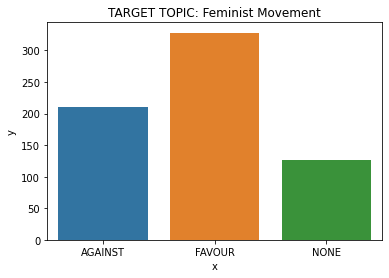

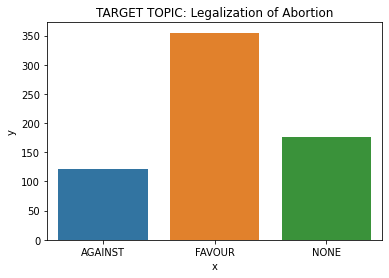

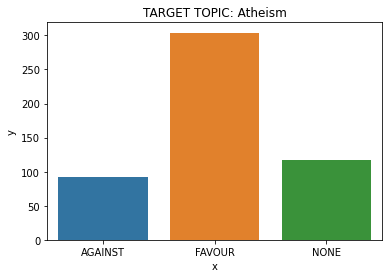

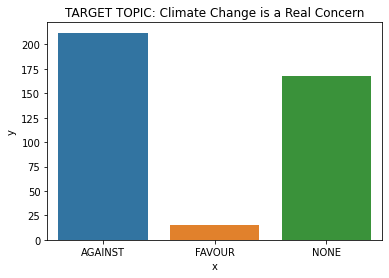

In [14]:
# Observe all topic distributions

for topic in train_data['Target'].unique():
  plotTopicDist(topic)

### Visualizations of word distribution in Tweets

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
'''
top_N=20

txt = train_data['Tweet'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

plt.figure(figsize=(40,20))
rslt.plot.bar(rot=0)

plt.xticks(rotation=75)
'''

"\ntop_N=20\n\ntxt = train_data['Tweet'].str.lower().str.replace(r'\\|', ' ').str.cat(sep=' ')\nwords = nltk.tokenize.word_tokenize(txt)\nword_dist = nltk.FreqDist(words)\n\nstopwords = nltk.corpus.stopwords.words('english')\nwords_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) \n\nprint('All frequencies, including STOPWORDS:')\nprint('=' * 60)\nrslt = pd.DataFrame(word_dist.most_common(top_N),\n                    columns=['Word', 'Frequency'])\nprint(rslt)\nprint('=' * 60)\n\nrslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),\n                    columns=['Word', 'Frequency']).set_index('Word')\n\nplt.style.use('ggplot')\n\nplt.figure(figsize=(40,20))\nrslt.plot.bar(rot=0)\n\nplt.xticks(rotation=75)\n"

### Word Cloud (Train Data)

In [17]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

def visualizeWordCloud(data):
  tweet_All = " ".join(review for review in data)

  plt.figure(figsize  = (30,30))
  # Create and generate a word cloud image:
  wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

  # Display the generated image:
  plt.imshow(wordcloud_ALL, interpolation='bilinear')
  plt.title('All Tweets', fontsize=30)
  plt.axis('off')


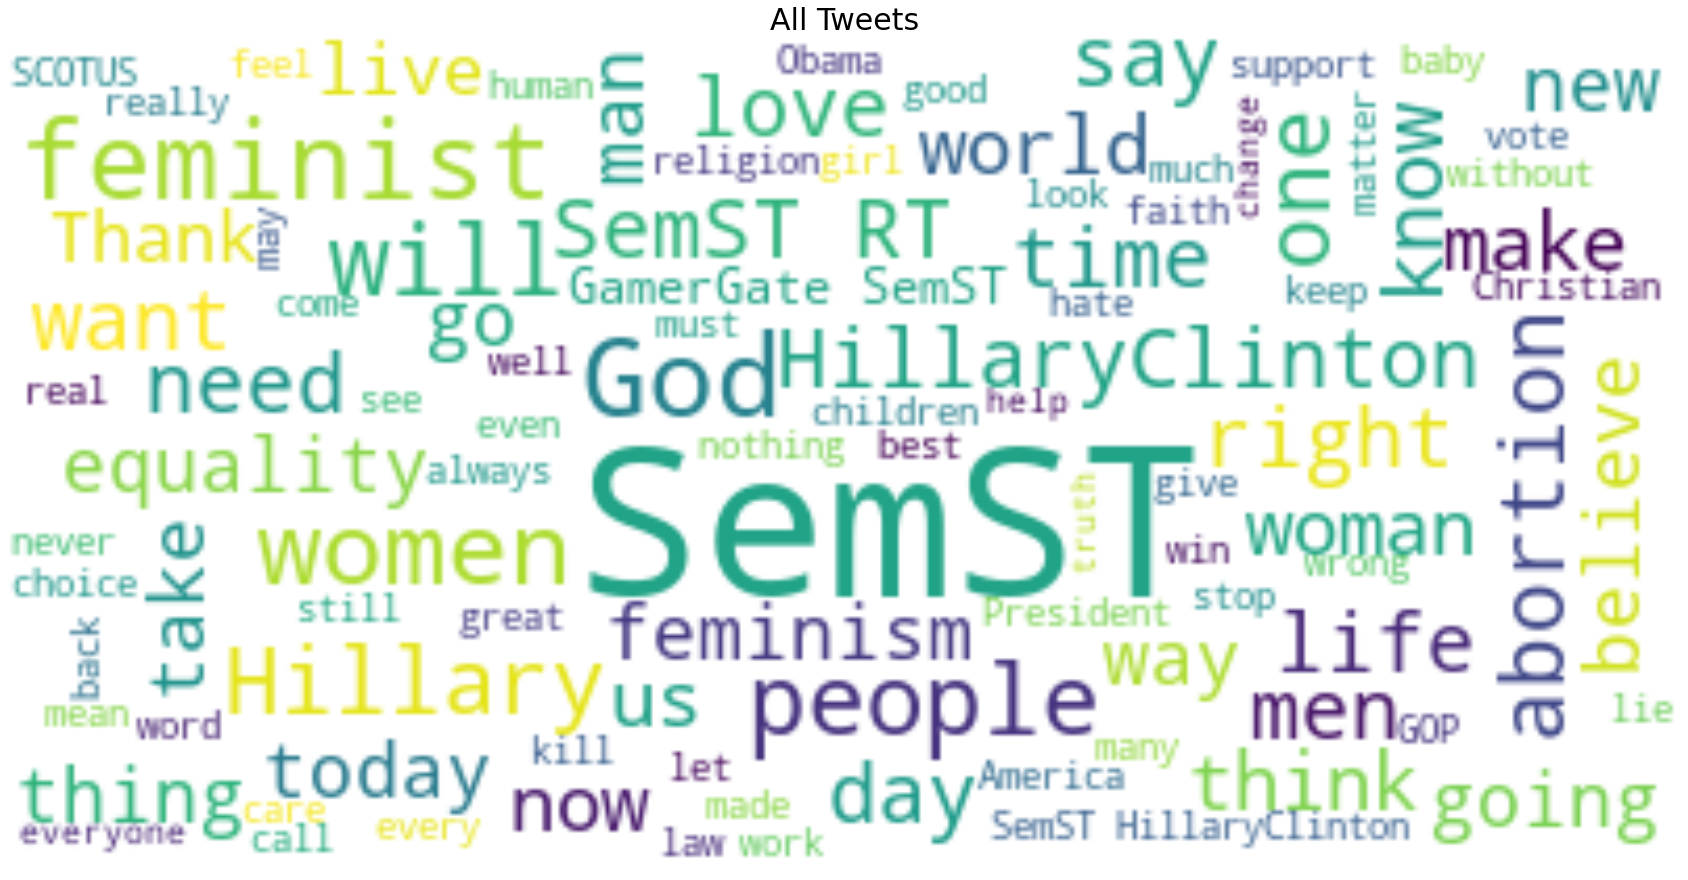

In [18]:
visualizeWordCloud(train_data['Tweet'])

### Word Cloud (Test Data)

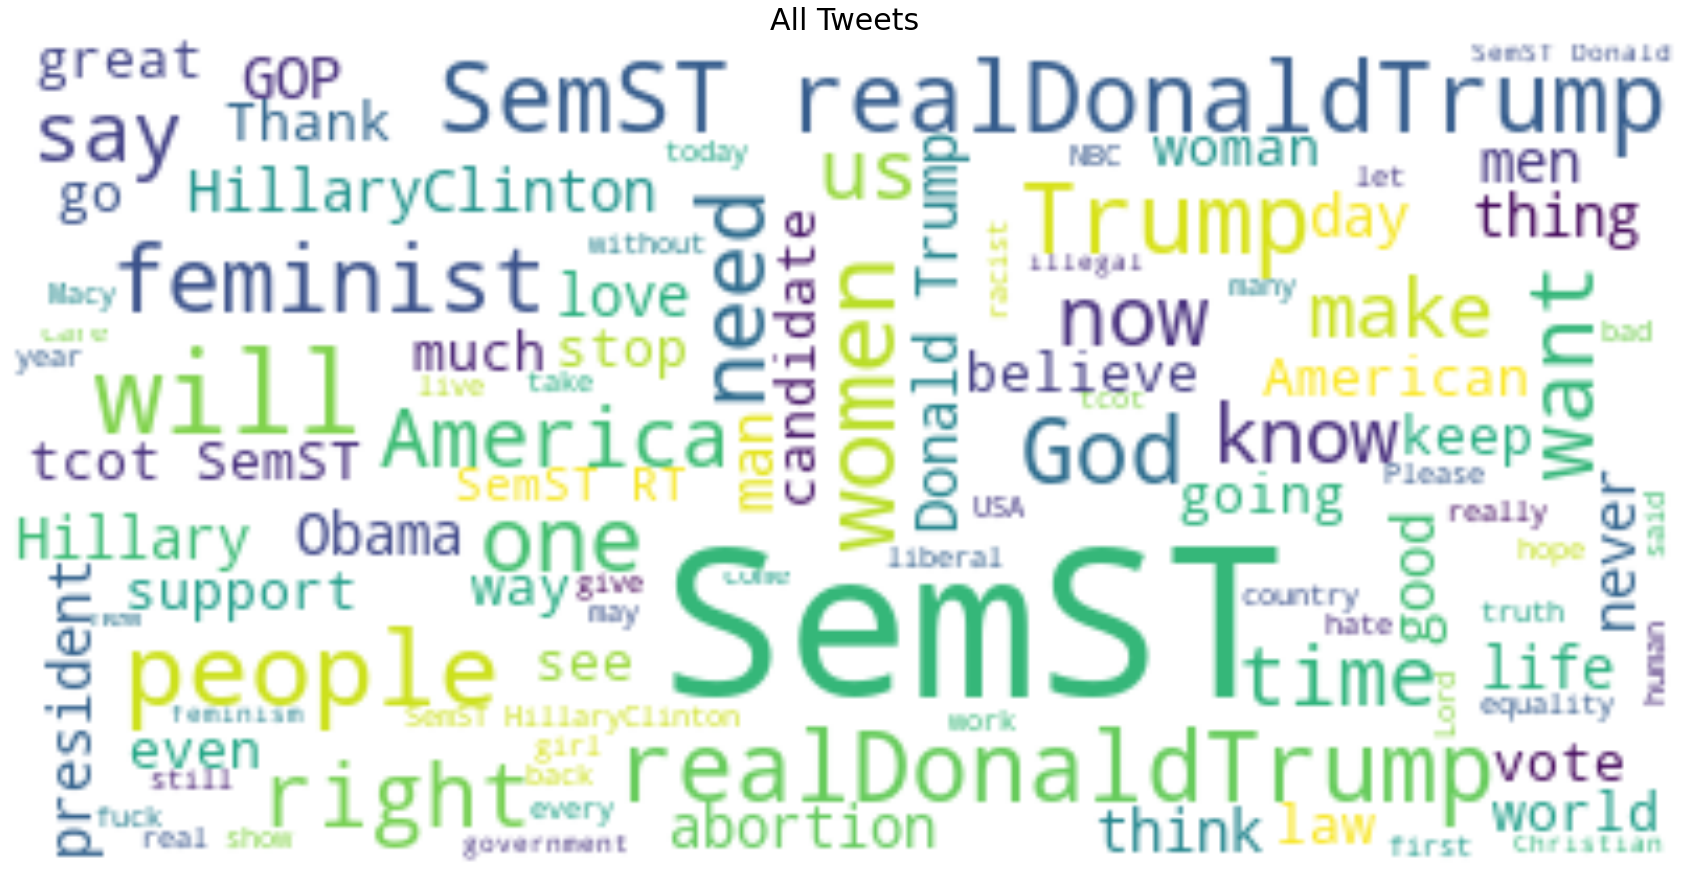

In [19]:
visualizeWordCloud(test_data['Tweet'])

### Topic Specific WordCloud

**Hillary Clinton**

In [20]:
def visualizeTopicWordCloud(TARGET_TOPIC):
  topicBool = train_data['Target'] == TARGET_TOPIC
  topic = train_data[topicBool]

  visualizeWordCloud(topic['Tweet'])

**Hillary Clinton**

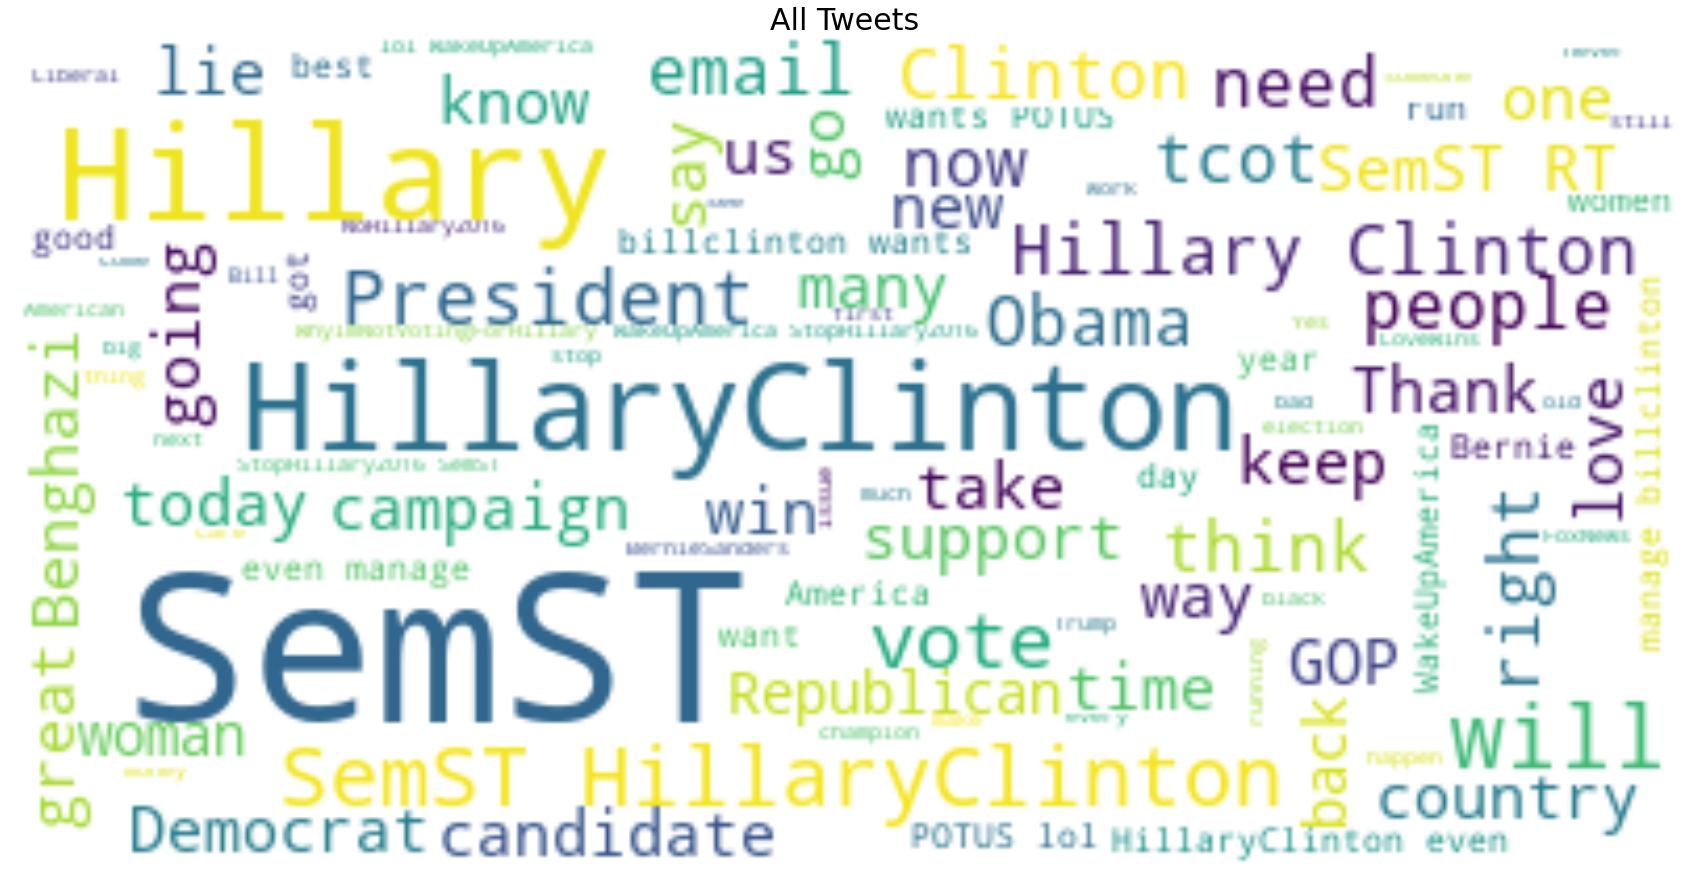

In [21]:
visualizeTopicWordCloud("Hillary Clinton")

**Legalization of Abortion**

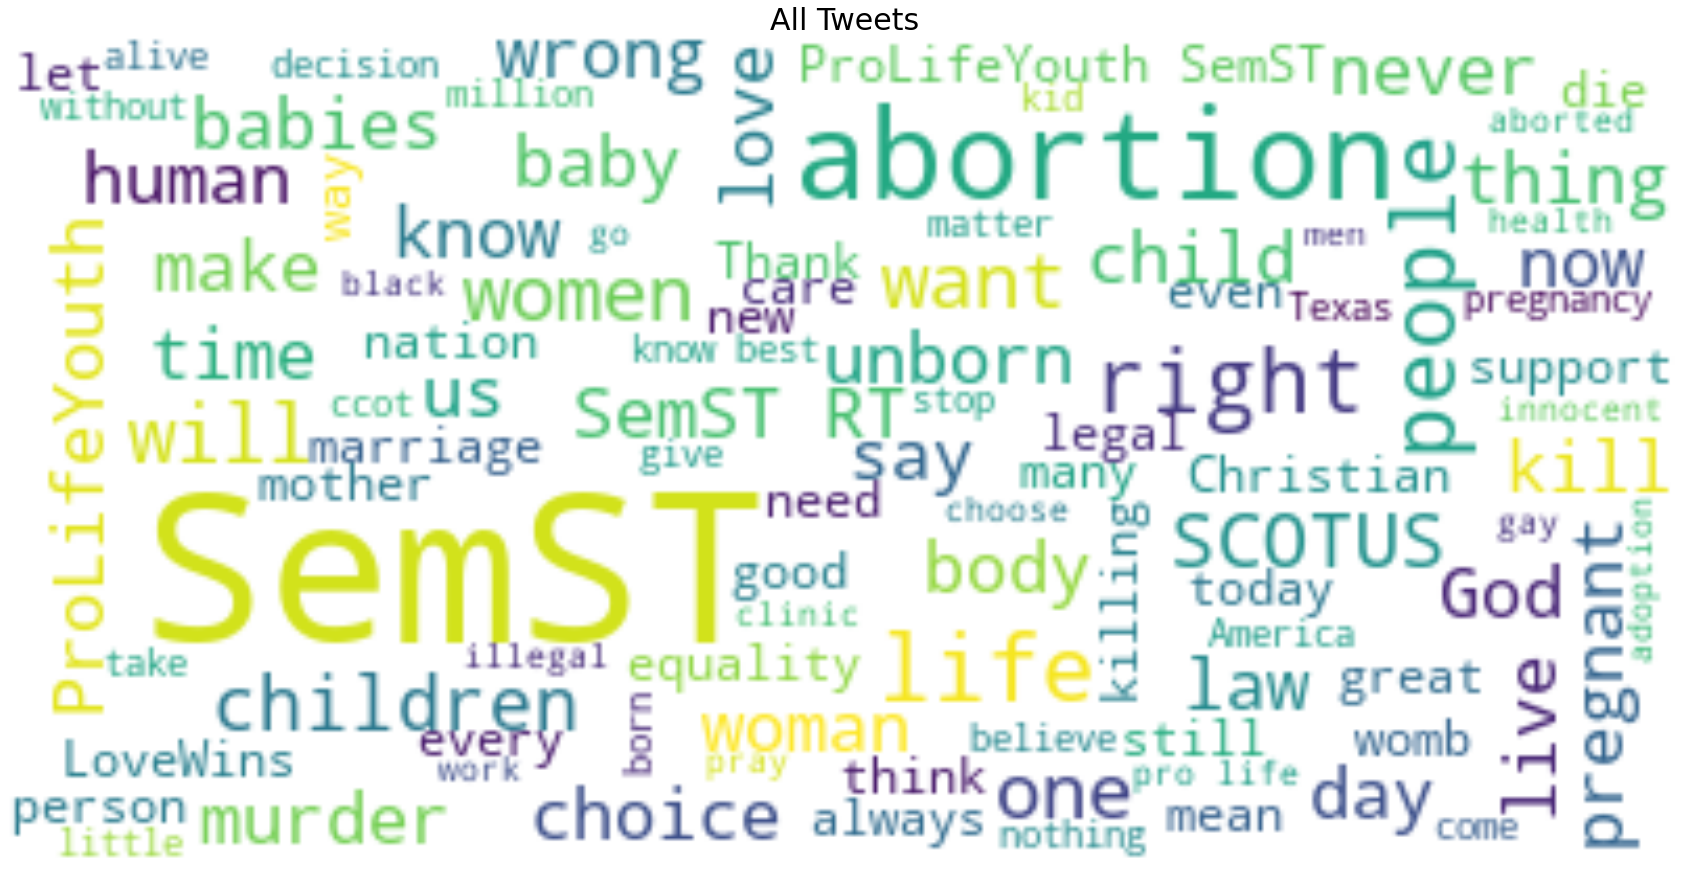

In [22]:
visualizeTopicWordCloud('Legalization of Abortion')

**Atheism**

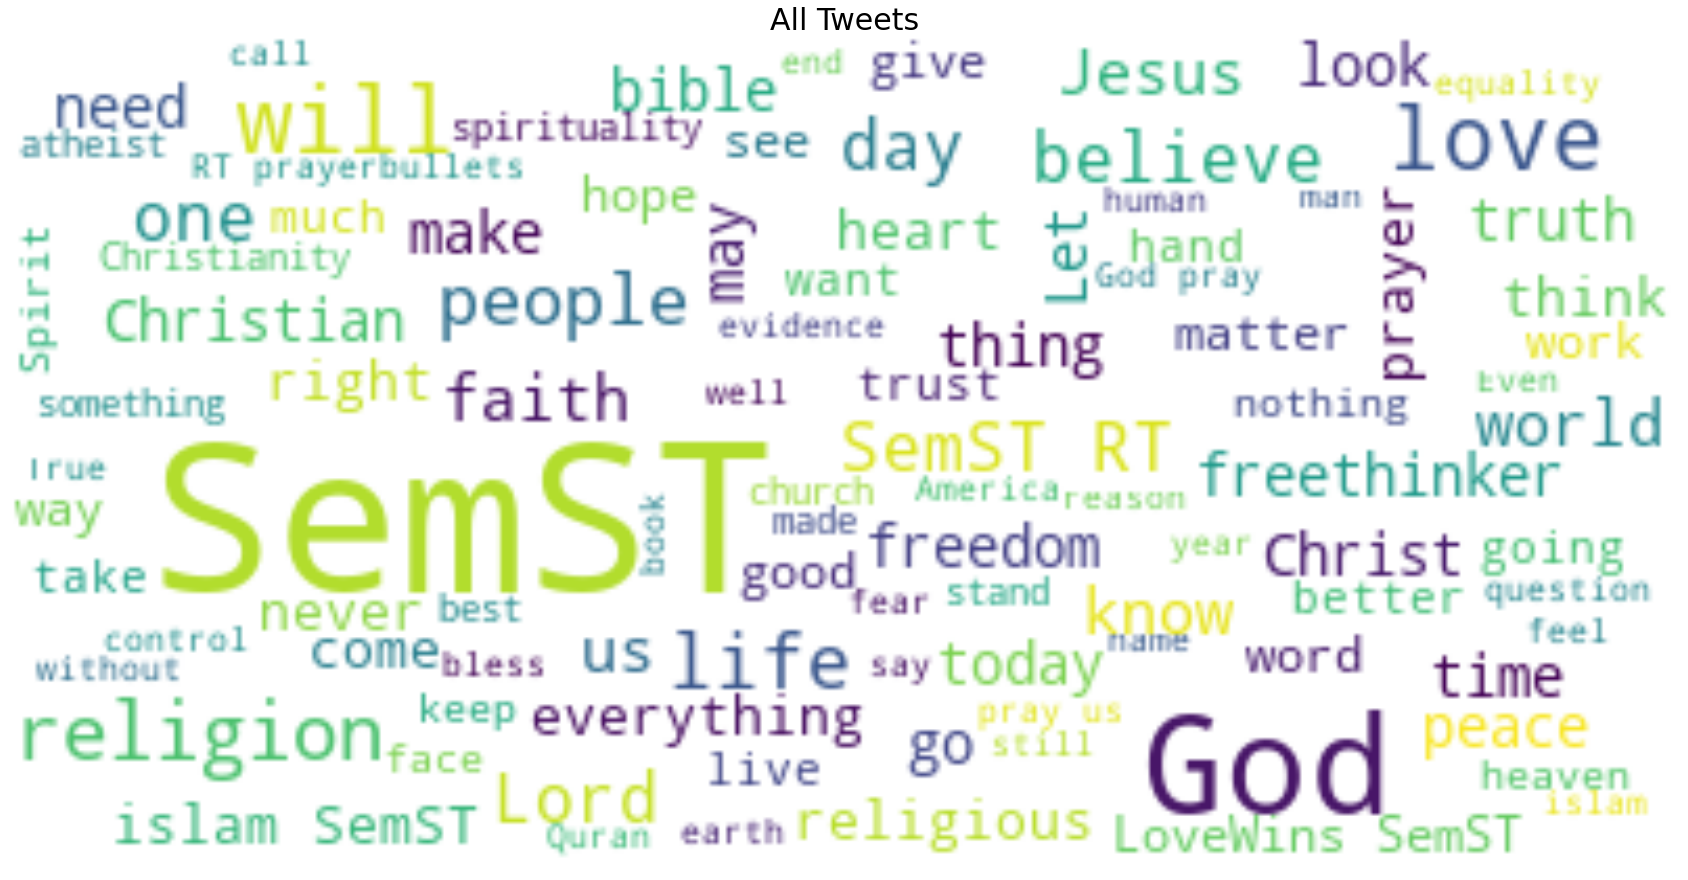

In [23]:
visualizeTopicWordCloud('Atheism')

**Climate Change is a Real Concern**

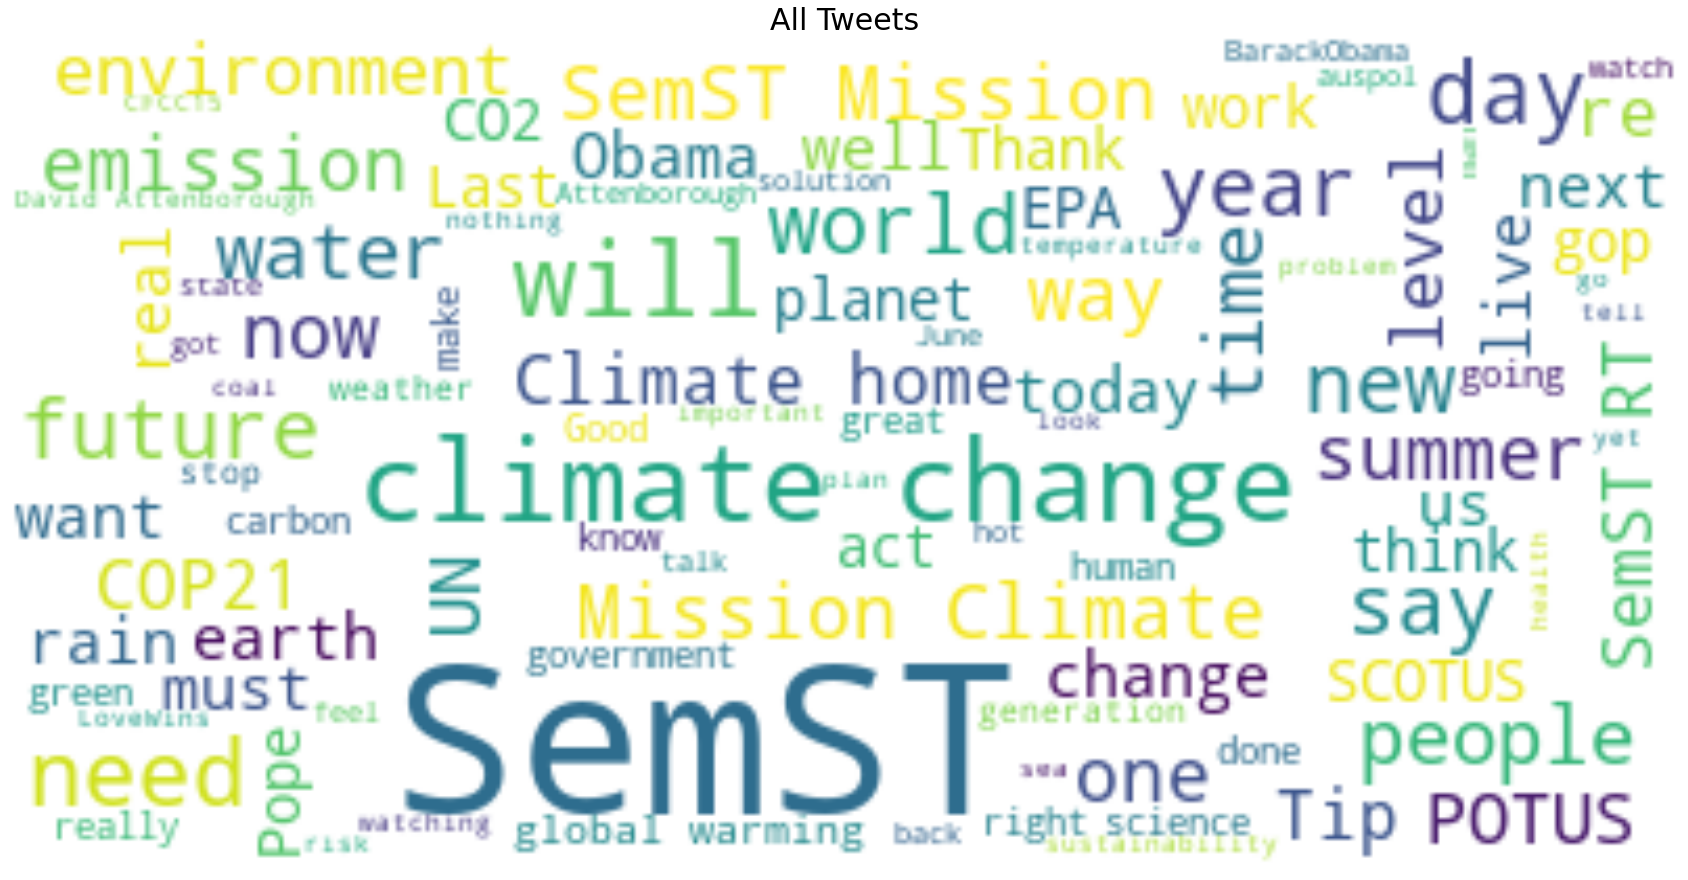

In [24]:
visualizeTopicWordCloud('Climate Change is a Real Concern')

**Feminist Movement**

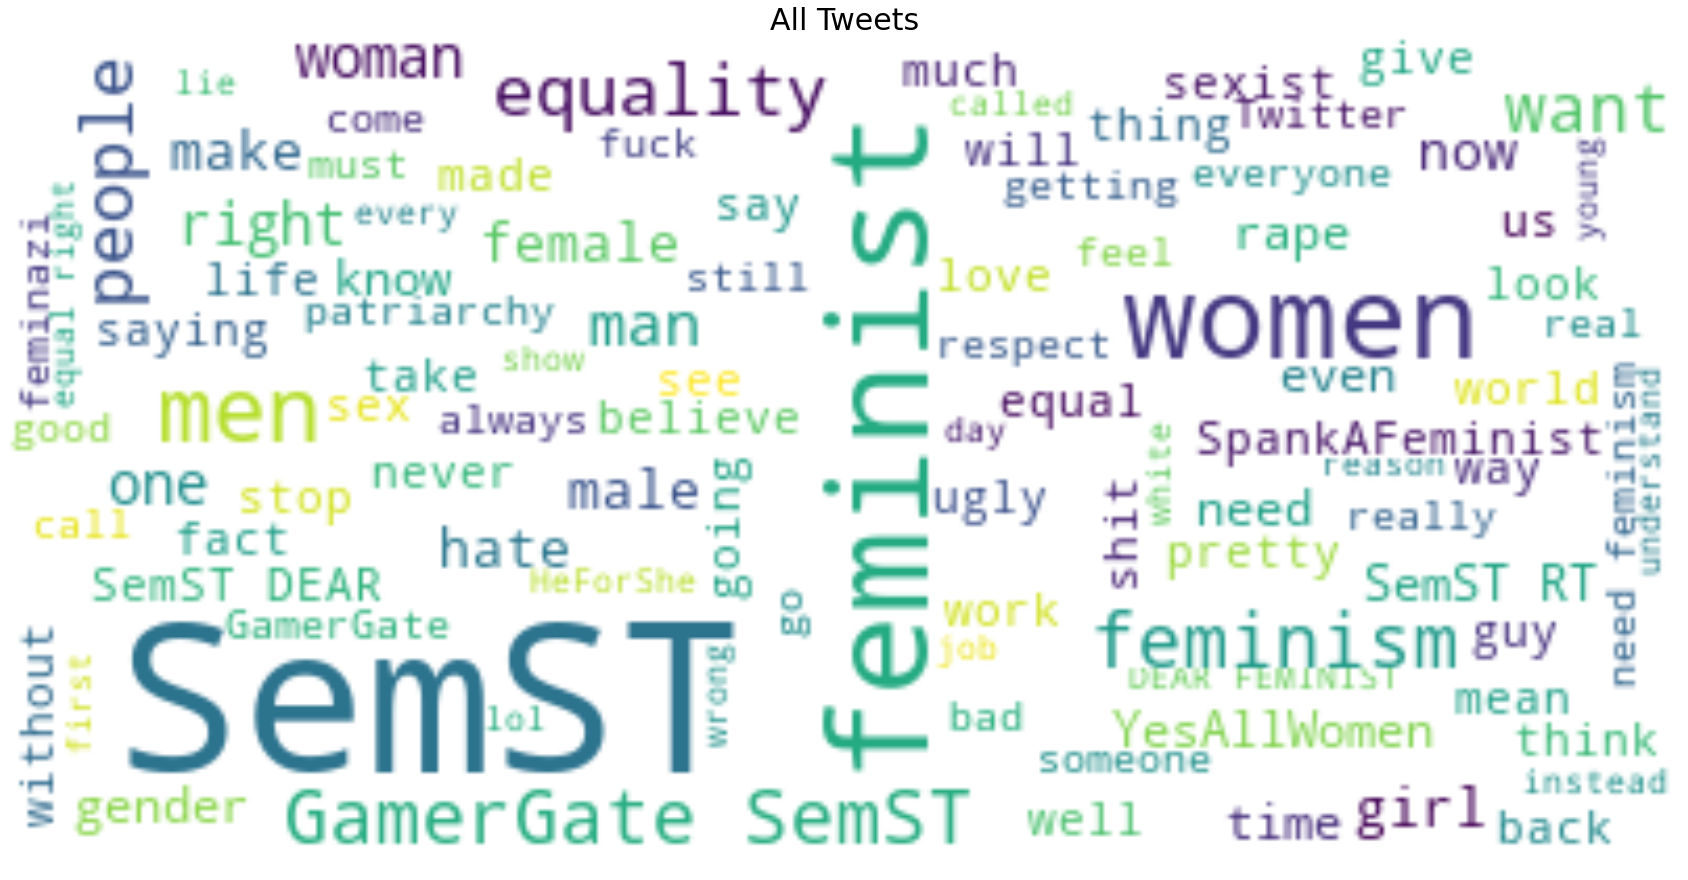

In [25]:
visualizeTopicWordCloud('Feminist Movement')

## Data Preparation

### Preparing Input & Target (x/y) values 

In [26]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweet_lines = list()
lines = train_data['Tweet'].values.tolist()

lines_length = list()
for line in lines:
    # tokenize the text
    tokens = word_tokenize(line)

    lines_length.append(len(tokens))

    tweet_lines.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
tweet_lines[:2]

[['@',
  'HillaryClinton',
  'Yes',
  '!',
  'I',
  'am',
  'chipping',
  'in',
  '5',
  '$',
  'because',
  'we',
  'have',
  'faith',
  'in',
  'you',
  '.',
  '#',
  'SemST'],
 ['Interesting',
  'in',
  'the',
  'video',
  'she',
  'kidnaps',
  'and',
  'tortures',
  '(',
  'tying',
  'up',
  ',',
  'confinement',
  ',',
  'etc',
  ')',
  'the',
  'wife',
  'or',
  'GF',
  'of',
  'the',
  'evil',
  'accountant',
  '#',
  'SemST']]

In [28]:
max_length=max(lines_length)

max_length

43

In [29]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweet_lines)
sequences = tokenizer_obj.texts_to_sequences(tweet_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

tweet_lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

unique tokens - 9591
vocab_size - 9592


In [30]:
tweet_lines_pad[:5]

array([[   4,   46,  252,   12,   11,  145, 3338,   15,  765,  199,   98,
          28,   29,  206,   15,   13,    3,    1,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 766,   15,    5,  478,   60, 3339,   14, 3340,  104, 3341,   77,
           7, 3342,    7,  615,   88,    5,  446,   62, 3343,   10,    5,
         383, 3344,    1,    2,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3345, 3346,  284,  767,   38, 3347,   23,  479, 3348,   39,  227,
         180,  181,   38,  187,   19,    8, 2065,  235,    1,    2,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 172,  285,  882,    5,  883,   10,  523,  684,   22,  269,  285,
        1016,    5,   45,   10,    1,   37,    3, 334

In [31]:

target_lines = list()
lines = train_data['Target'].values.tolist()

target_lines_length = list()
for line in lines:
    # tokenize the text
    tokens = word_tokenize(line)

    target_lines_length.append(len(tokens))

    target_lines.append(tokens)

In [32]:
target_max_length=max(target_lines_length)

target_max_length

6

In [33]:

sequences = tokenizer_obj.texts_to_sequences(target_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

target_lines_pad = pad_sequences(sequences, maxlen=target_max_length, padding='post')

unique tokens - 9591
vocab_size - 9592


In [34]:
target_lines_pad[:5]

array([[  53,  151,    0,    0,    0,    0],
       [  89,  999,    0,    0,    0,    0],
       [6039,   10,   73,    0,    0,    0],
       [1301,    0,    0,    0,    0,    0],
       [6039,   10,   73,    0,    0,    0]], dtype=int32)

In [35]:
print("Tweet Lines Shape", tweet_lines_pad.shape)
print("Target Lines Shape", target_lines_pad.shape)


Tweet Lines Shape (2914, 43)
Target Lines Shape (2914, 6)


In [37]:
'''
from keras.preprocessing.text import text_to_word_sequence

total_vocab=[]
# tokenize the document

index=0
for value in train_data['Tweet']:
  #train_data['Tweet'][index] = text_to_word_sequence(value)
  print(text_to_word_sequence(value))
  total_vocab.extend(text_to_word_sequence(value))

  index += 1
'''


"\nfrom keras.preprocessing.text import text_to_word_sequence\n\ntotal_vocab=[]\n# tokenize the document\n\nindex=0\nfor value in train_data['Tweet']:\n  #train_data['Tweet'][index] = text_to_word_sequence(value)\n  print(text_to_word_sequence(value))\n  total_vocab.extend(text_to_word_sequence(value))\n\n  index += 1\n"

In [38]:
'''
index=0
for value in train_data['Target']:
  #train_data['Target'][index] = text_to_word_sequence(value)
  total_vocab.extend(text_to_word_sequence(value))
  index+=1
'''

"\nindex=0\nfor value in train_data['Target']:\n  #train_data['Target'][index] = text_to_word_sequence(value)\n  total_vocab.extend(text_to_word_sequence(value))\n  index+=1\n"

In [39]:

'''
vocab_size_cleaned = len(set(total_vocab))


# Calculate Vocabulary size in dataset
vocab_size_cleaned
'''

'\nvocab_size_cleaned = len(set(total_vocab))\n\n\n# Calculate Vocabulary size in dataset\nvocab_size_cleaned\n'

In [40]:
'''
from keras.preprocessing.text import one_hot

index=0
tweet_max_length = []
for value in train_data['Tweet']:
  train_data['Tweet'][index]= one_hot(value, vocab_size + 1)
  tweet_max_length.append(len(train_data['Tweet'][index]))

  #train_data['Tweet'][index] = np.asarray(train_data['Tweet'][index]).astype(np.float32)

  index+=1
'''



"\nfrom keras.preprocessing.text import one_hot\n\nindex=0\ntweet_max_length = []\nfor value in train_data['Tweet']:\n  train_data['Tweet'][index]= one_hot(value, vocab_size + 1)\n  tweet_max_length.append(len(train_data['Tweet'][index]))\n\n  #train_data['Tweet'][index] = np.asarray(train_data['Tweet'][index]).astype(np.float32)\n\n  index+=1\n"

In [41]:
'''
index=0
target_max_length = []
for value in train_data['Target']:
  train_data['Target'][index]= one_hot(value, vocab_size + 1)
  target_max_length.append(len(train_data['Target'][index]))

  #train_data['Target'][index] = np.asarray(train_data['Target'][index]).astype(np.float32)

  index+=1

'''

"\nindex=0\ntarget_max_length = []\nfor value in train_data['Target']:\n  train_data['Target'][index]= one_hot(value, vocab_size + 1)\n  target_max_length.append(len(train_data['Target'][index]))\n\n  #train_data['Target'][index] = np.asarray(train_data['Target'][index]).astype(np.float32)\n\n  index+=1\n\n"

In [42]:
'''
print("Target Max Length:",max(target_max_length) )
print("Tweet Max Length:",max(tweet_max_length) )
'''

'\nprint("Target Max Length:",max(target_max_length) )\nprint("Tweet Max Length:",max(tweet_max_length) )\n'

In [43]:
'''
index=0


from keras.preprocessing.sequence import pad_sequences


from keras import utils as np_utils

print(train_data['Tweet'])
train_data['Tweet'] = train_data['Tweet']
train_data['Target'] = train_data['Target']


tweet_list = []
target_list = []
for x in train_data['Tweet']:
  tweet_list.append(x)

for x in train_data['Target']:
  target_list.append(x)
print(tweet_list)

tweet_padded_list = pad_sequences(tweet_list, maxlen=max(tweet_max_length), padding='post')
target_padded_list = pad_sequences(target_list, maxlen=max(target_max_length), padding='post')

print(target_padded_list)


print("Tweets Shape:", )
'''

'\nindex=0\n\n\nfrom keras.preprocessing.sequence import pad_sequences\n\n\nfrom keras import utils as np_utils\n\nprint(train_data[\'Tweet\'])\ntrain_data[\'Tweet\'] = train_data[\'Tweet\']\ntrain_data[\'Target\'] = train_data[\'Target\']\n\n\ntweet_list = []\ntarget_list = []\nfor x in train_data[\'Tweet\']:\n  tweet_list.append(x)\n\nfor x in train_data[\'Target\']:\n  target_list.append(x)\nprint(tweet_list)\n\ntweet_padded_list = pad_sequences(tweet_list, maxlen=max(tweet_max_length), padding=\'post\')\ntarget_padded_list = pad_sequences(target_list, maxlen=max(target_max_length), padding=\'post\')\n\nprint(target_padded_list)\n\n\nprint("Tweets Shape:", )\n'

In [44]:
from keras import utils as np_utils

stance_list = []

for value in train_data['Stance']:
  if value == "FAVOR":
    stance_list.append(0)
  elif value == "NONE":
    stance_list.append(1)
  elif value == "AGAINST":
    stance_list.append(2)

print(stance_list)

stance_list = np_utils.to_categorical(stance_list)

print(stance_list)



[0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 

In [45]:

print("Tweet x Shape", tweet_lines_pad.shape )
print("Target x Shape", target_lines_pad.shape)
print("Stance y Shape", stance_list.shape)

Tweet x Shape (2914, 43)
Target x Shape (2914, 6)
Stance y Shape (2914, 3)


### Importing GloVe Twitter Embedding Vector

In [56]:
!ls

glove.twitter.27B.100d.txt  glove.twitter.27B.25d.txt  train.csv
glove.twitter.27B.200d.txt  test.csv


In [57]:
file = open('glove.twitter.27B.25d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

In [58]:
len(glove_vectors)

1193515

In [59]:

# Currently using 25d Glove twitter vector
embedding_dim = 25

E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector

In [60]:
len(word_index) + 1

9592

In [61]:
vocab_size

9592

In [62]:
len(E_T)

9592

In [63]:
E_T.shape

(9592, 25)

In [64]:
E_T[:5]

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [-2.2741e-02,  1.2138e-01, -1.0804e+00, -3.6995e-01,  9.6968e-02,
        -5.1322e-01,  8.0860e-01,  1.7618e+00, -1.4118e+00,  5.4930e-01,
        -3.2581e-01, -2.8722e-01, -2.4010e+00,  1.1022e-01, -1.4755e+00,
        -1.1018e+00, -1.0359e+00, -4.1707e-01, -5.7667e-01,  4.5338e-01,
        -2.4933e-01, -5.4078e-01,  4.8753e-01, -6.1299e-01,  8.8729e-01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0

##Multi-input RNN Model

In [36]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional,Input

from keras import regularizers
from keras import Model
from keras import optimizers
%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense, Dropout

from keras.engine.topology import Layer
import keras.backend as K

from keras import initializers
from keras.layers.normalization import BatchNormalization

In [65]:
def simple_model(embedding_dim = 25):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = tf.keras.layers.Multiply()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu")(combined)
  
  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [66]:
model = simple_model()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history = model.fit(
                  x=[tweet_lines_pad,target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE)

Epoch 1/50
73/73 [==============================] - 4s 50ms/step - loss: 1.0153 - accuracy: 0.5174 - val_loss: 0.9608 - val_accuracy: 0.5506
Epoch 2/50
73/73 [==============================] - 2s 30ms/step - loss: 0.9515 - accuracy: 0.5521 - val_loss: 0.9300 - val_accuracy: 0.5660
Epoch 3/50
73/73 [==============================] - 2s 30ms/step - loss: 0.9293 - accuracy: 0.5646 - val_loss: 0.9096 - val_accuracy: 0.5883
Epoch 4/50
73/73 [==============================] - 2s 29ms/step - loss: 0.9082 - accuracy: 0.5710 - val_loss: 0.9043 - val_accuracy: 0.5935
Epoch 5/50
73/73 [==============================] - 2s 29ms/step - loss: 0.8813 - accuracy: 0.5920 - val_loss: 0.8902 - val_accuracy: 0.6038
Epoch 6/50
73/73 [==============================] - 2s 32ms/step - loss: 0.8607 - accuracy: 0.6019 - val_loss: 0.8840 - val_accuracy: 0.6003
Epoch 7/50
73/73 [==============================] - 2s 29ms/step - loss: 0.8489 - accuracy: 0.6100 - val_loss: 0.8813 - val_accuracy: 0.5986
Epoch 8/50
73

### Simple model with 25-dimensional embedding vector

In [67]:
def simple_model_with_reg(embedding_dim = 25, dropout_rate = 0.4, lambda_val = 1e-4):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = tf.keras.layers.Multiply()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(combined)

  z = Dropout(dropout_rate)(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [68]:
model = simple_model_with_reg()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history_with_reg = model.fit(
                  x=[tweet_lines_pad,target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE)

Epoch 1/50
73/73 [==============================] - 6s 87ms/step - loss: 1.0876 - accuracy: 0.4680 - val_loss: 1.0264 - val_accuracy: 0.5489
Epoch 2/50
73/73 [==============================] - 5s 74ms/step - loss: 1.0184 - accuracy: 0.5367 - val_loss: 0.9850 - val_accuracy: 0.5506
Epoch 3/50
73/73 [==============================] - 5s 73ms/step - loss: 0.9978 - accuracy: 0.5440 - val_loss: 0.9857 - val_accuracy: 0.5506
Epoch 4/50
73/73 [==============================] - 5s 72ms/step - loss: 0.9989 - accuracy: 0.5375 - val_loss: 0.9789 - val_accuracy: 0.5506
Epoch 5/50
73/73 [==============================] - 5s 72ms/step - loss: 0.9873 - accuracy: 0.5491 - val_loss: 0.9610 - val_accuracy: 0.5523
Epoch 6/50
73/73 [==============================] - 5s 73ms/step - loss: 0.9795 - accuracy: 0.5474 - val_loss: 0.9771 - val_accuracy: 0.5523
Epoch 7/50
73/73 [==============================] - 5s 73ms/step - loss: 0.9778 - accuracy: 0.5500 - val_loss: 0.9569 - val_accuracy: 0.5660
Epoch 8/50
73

In [69]:
from itertools import cycle
def plotter(history_hold, metric = 'loss', ylim=[0.0, 1.0]):
  cycol = cycle('bgrcmk')
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)

    plt.plot(x_train, y_train, c+'-', label=name+'_train')
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid(True)

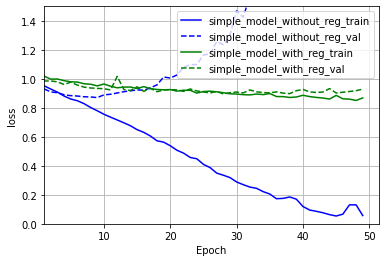

In [70]:
histories = {}

histories["simple_model_without_reg"] = history
histories["simple_model_with_reg"] = history_with_reg
plotter(histories, ylim=[0.0,1.5])

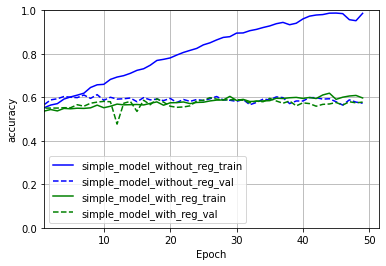

In [76]:
histories = {}

histories["simple_model_without_reg"] = history
histories["simple_model_with_reg"] = history_with_reg
plotter(histories,metric="accuracy", ylim=[0.0,1.0])

### Simple model with 100-dimensional embedding vector

In [72]:
file = open('glove.twitter.27B.100d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

# Currently using 100d Glove twitter vector
embedding_dim = 100

E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector

In [79]:
model = simple_model_with_reg(embedding_dim=embedding_dim)

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 30
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history_100d = model.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE)

Epoch 1/30
73/73 [==============================] - 8s 105ms/step - loss: 1.1025 - accuracy: 0.4698 - val_loss: 1.0142 - val_accuracy: 0.5506
Epoch 2/30
73/73 [==============================] - 7s 91ms/step - loss: 1.0157 - accuracy: 0.5414 - val_loss: 0.9940 - val_accuracy: 0.5506
Epoch 3/30
73/73 [==============================] - 7s 91ms/step - loss: 1.0006 - accuracy: 0.5440 - val_loss: 0.9869 - val_accuracy: 0.5489
Epoch 4/30
73/73 [==============================] - 7s 91ms/step - loss: 1.0000 - accuracy: 0.5414 - val_loss: 0.9648 - val_accuracy: 0.5506
Epoch 5/30
73/73 [==============================] - 7s 91ms/step - loss: 0.9813 - accuracy: 0.5470 - val_loss: 0.9549 - val_accuracy: 0.5660
Epoch 6/30
73/73 [==============================] - 7s 91ms/step - loss: 0.9586 - accuracy: 0.5508 - val_loss: 0.9419 - val_accuracy: 0.5729
Epoch 7/30
73/73 [==============================] - 7s 90ms/step - loss: 0.9388 - accuracy: 0.5659 - val_loss: 0.9543 - val_accuracy: 0.5437
Epoch 8/30
7

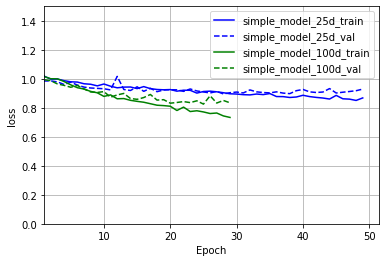

In [80]:
histories = {}

histories['simple_model_25d'] = history_with_reg
histories['simple_model_100d'] = history_100d

plotter(histories, ylim=[0.0,1.5])

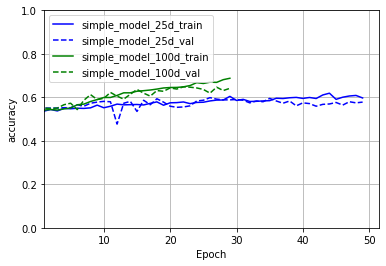

In [81]:
plotter(histories,metric="accuracy", ylim=[0.0,1.0])